In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pickle
import plotly.express as px
import streamlit as st
from sklearn.preprocessing import MinMaxScaler

In [3]:
#data loading
raw_data=pd.read_csv('Churn_Modelling.csv')
raw_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Data Investigating
for column in raw_data:
    unique_val= np.unique(raw_data[column].fillna('0'))
    nr_values= len(unique_val)
    if nr_values<=12:
        print('The number of value for feature {}:{}...{}'.format(column,nr_values,unique_val))
    else:
        print ('The number of value for feature {}:{}'.format(column,nr_values))   

The number of value for feature RowNumber:10000
The number of value for feature CustomerId:10000
The number of value for feature Surname:2932
The number of value for feature CreditScore:460
The number of value for feature Geography:3...['France' 'Germany' 'Spain']
The number of value for feature Gender:2...['Female' 'Male']
The number of value for feature Age:70
The number of value for feature Tenure:11...[ 0  1  2  3  4  5  6  7  8  9 10]
The number of value for feature Balance:6382
The number of value for feature NumOfProducts:4...[1 2 3 4]
The number of value for feature HasCrCard:2...[0 1]
The number of value for feature IsActiveMember:2...[0 1]
The number of value for feature EstimatedSalary:9999
The number of value for feature Exited:2...[0 1]


In [5]:
raw_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#Checking for null values
raw_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Data Visualization.

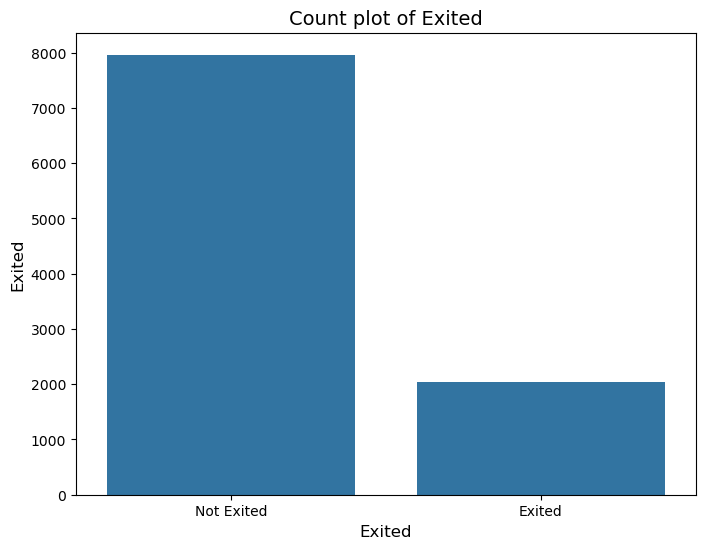

In [8]:
# Count plot of our Y - Check the balance of the dataset
plt.figure(figsize = (8,6))
sns.countplot(data=raw_data,x="Exited")
plt.title("Count plot of Exited",fontsize=14)
plt.xlabel("Exited",fontsize=12)
plt.ylabel("Exited",fontsize=12)
plt.xticks([0,1],labels = ["Not Exited","Exited"])
plt.show()

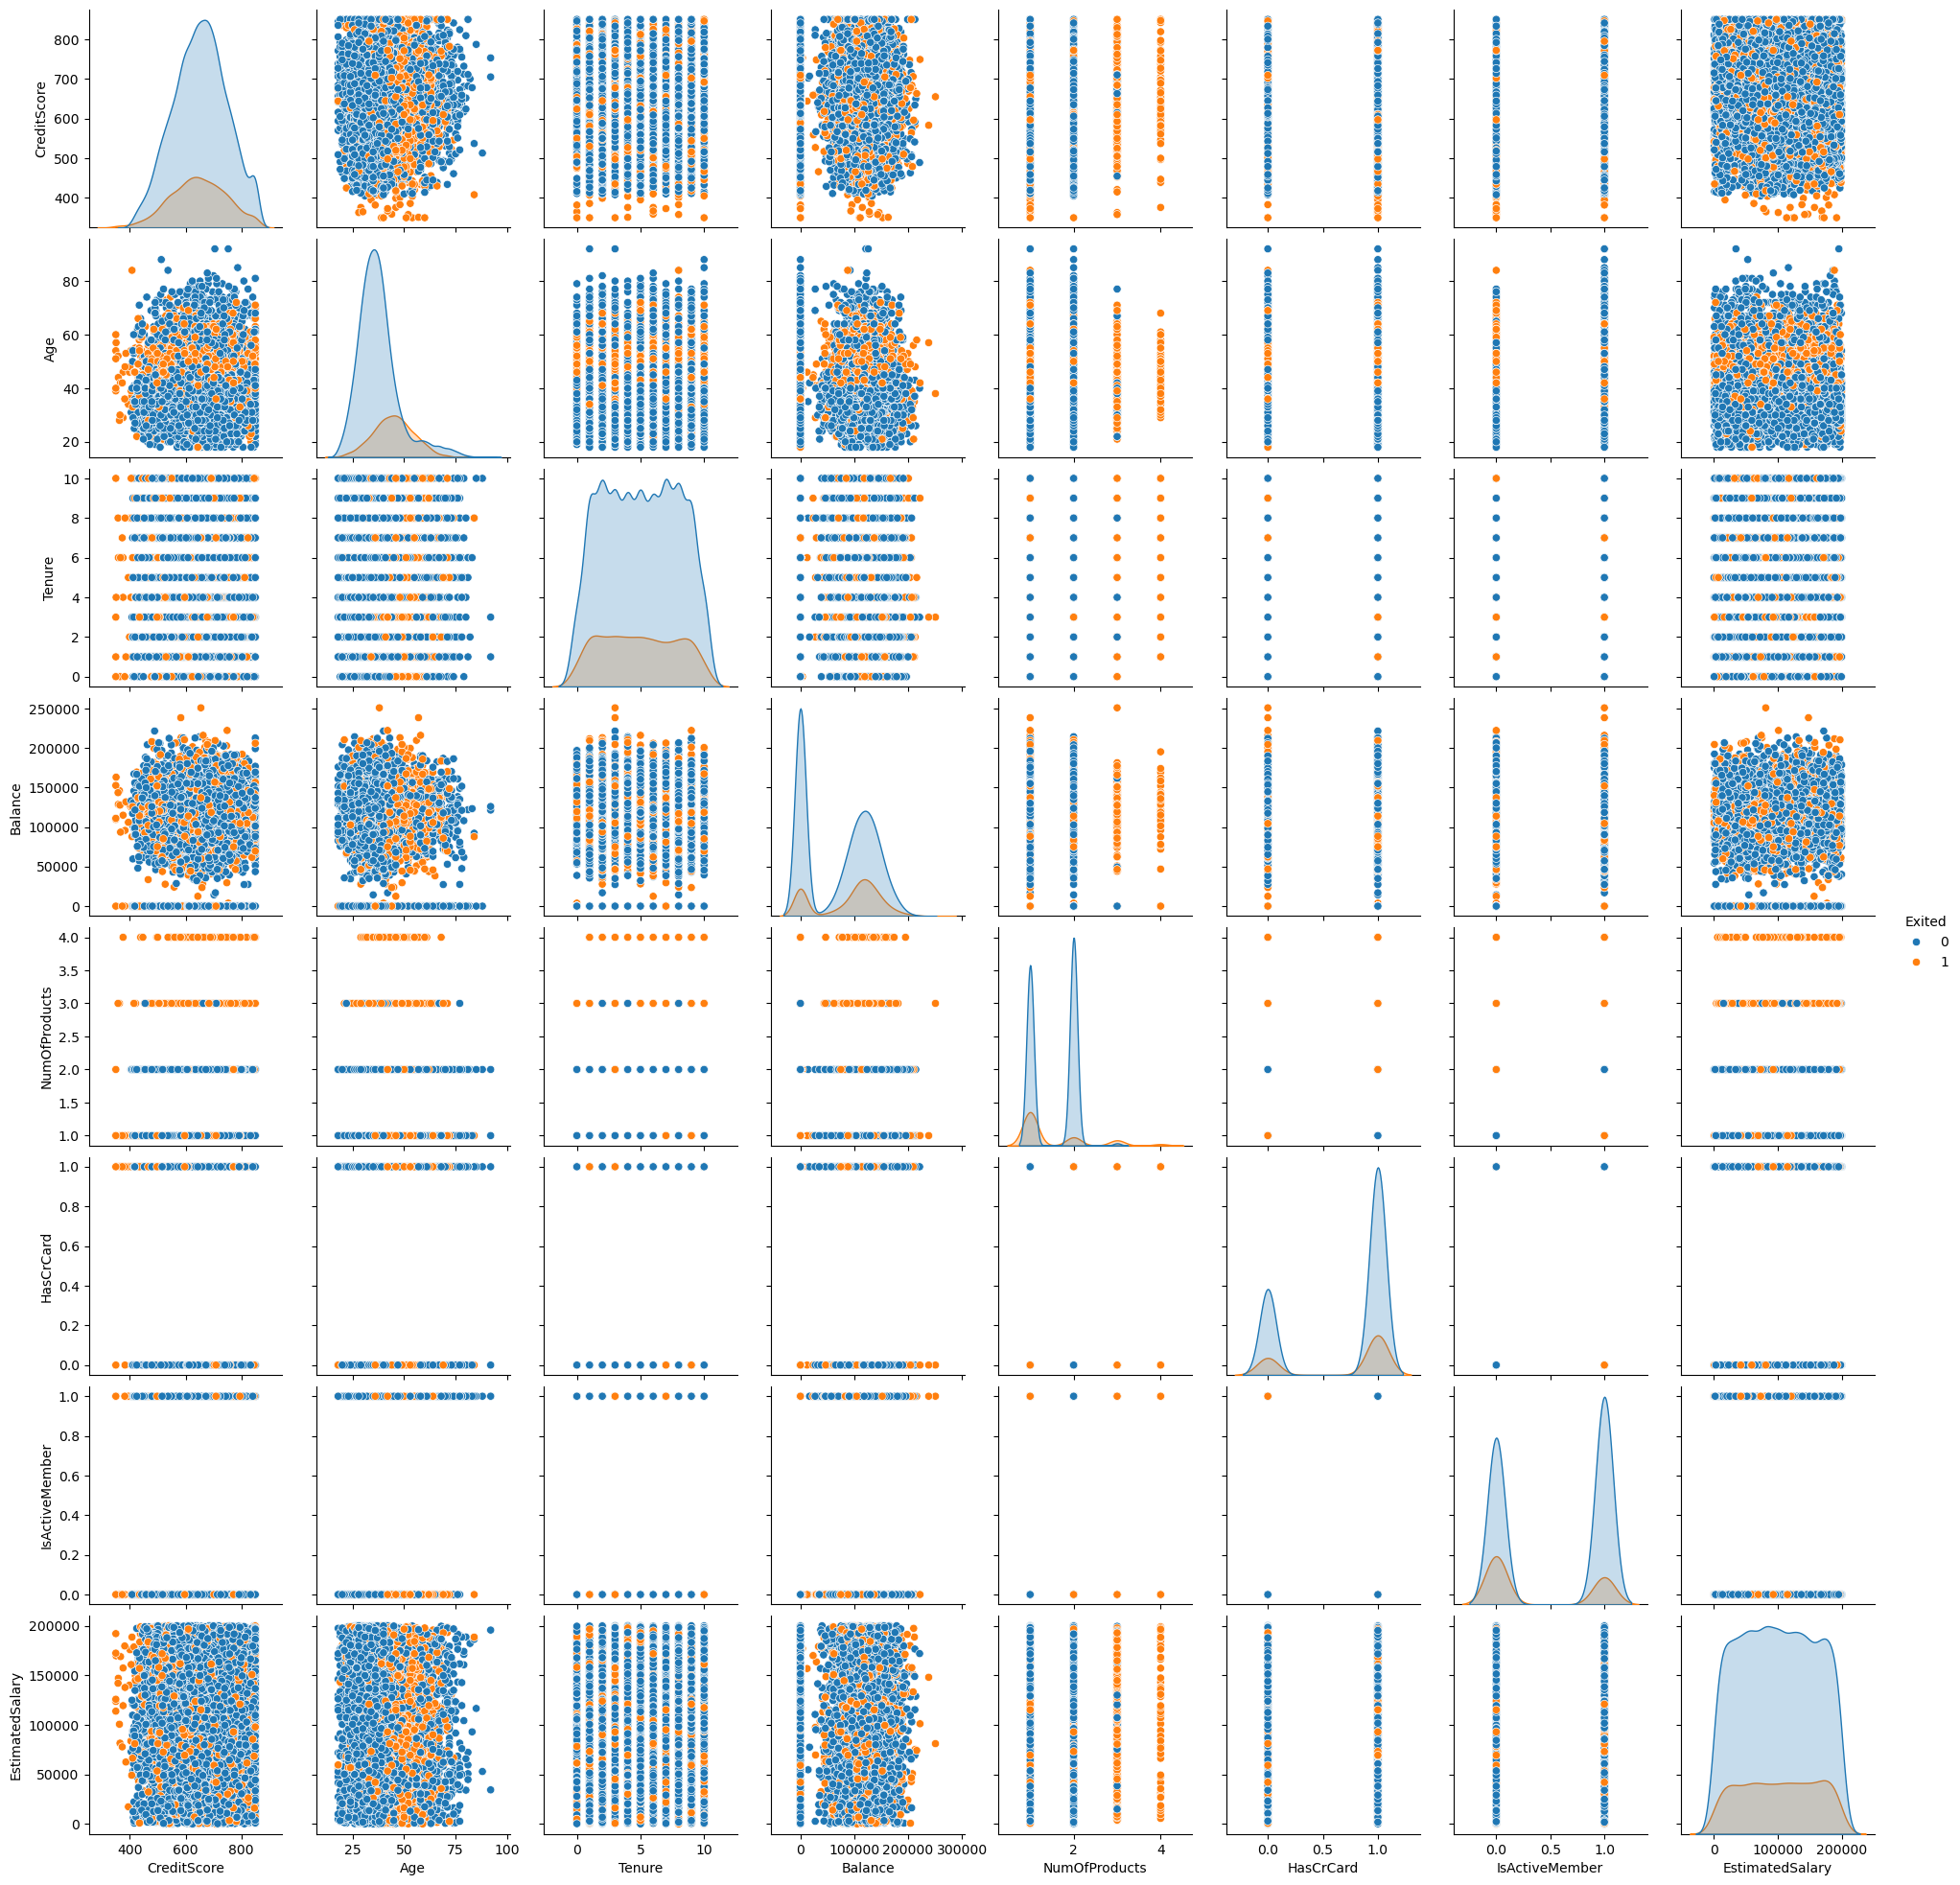

In [9]:
#Limiting the data
raw_data_visual=raw_data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]

#Visualize
g=sns.pairplot(raw_data_visual,hue='Exited')

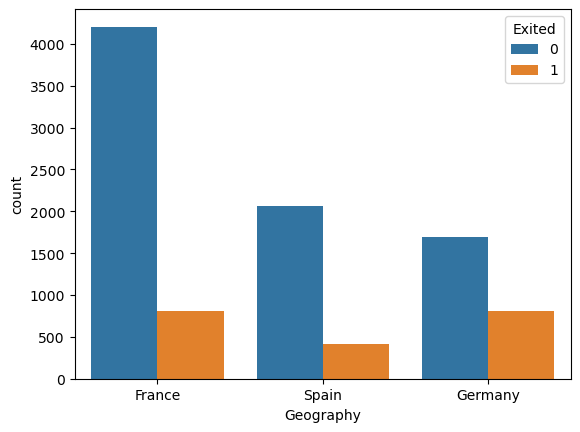

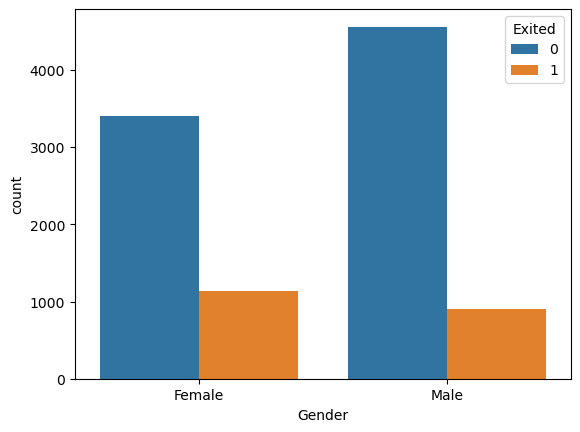

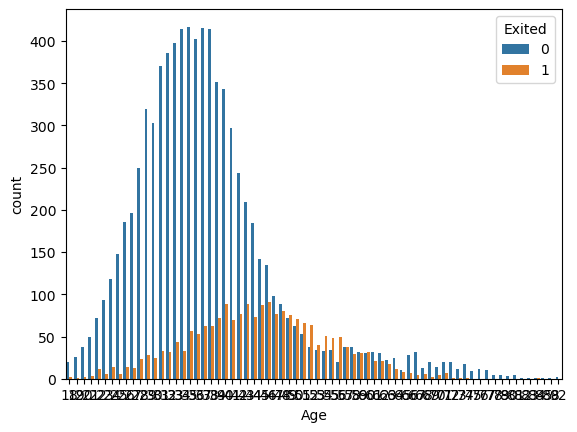

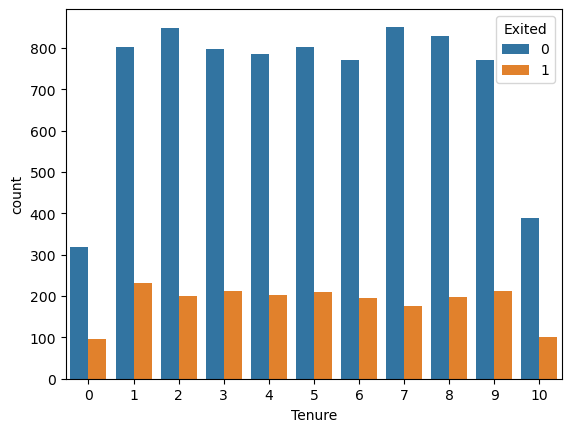

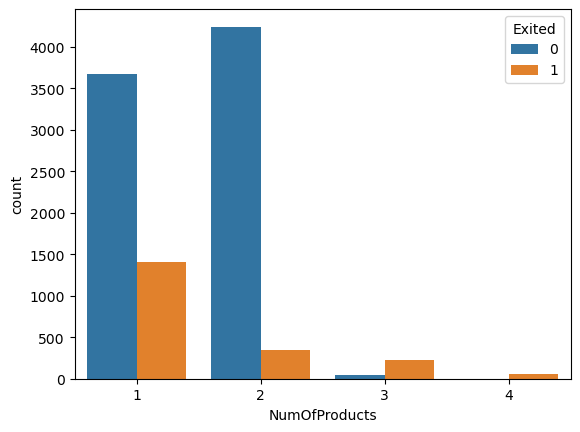

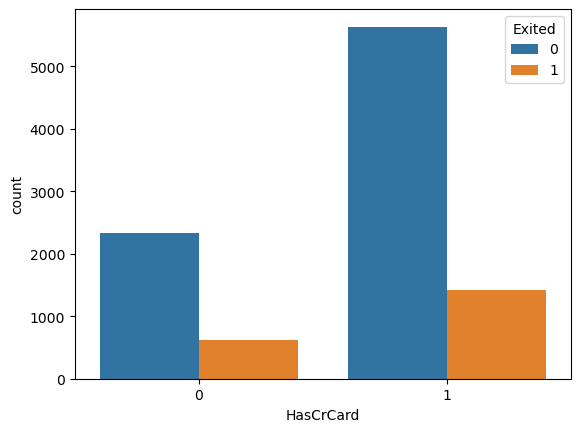

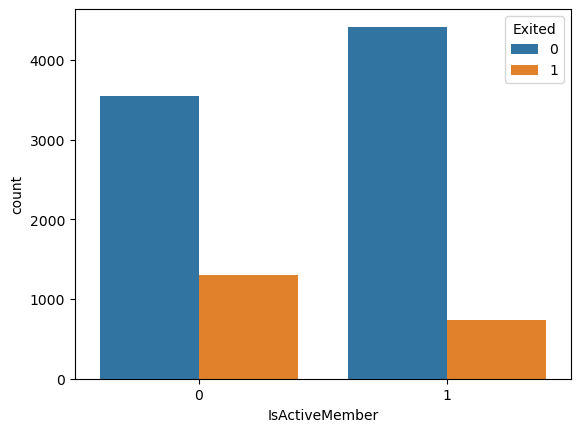

In [10]:
#Investigate all of our features by our Y
features = ['Geography', 'Gender', 'Age', 'Tenure',  'NumOfProducts', 'HasCrCard', 'IsActiveMember']

for f in features:
    plt.figure()
    ax=sns.countplot(x=f, data=raw_data_visual,hue='Exited')

The median is:  652.0


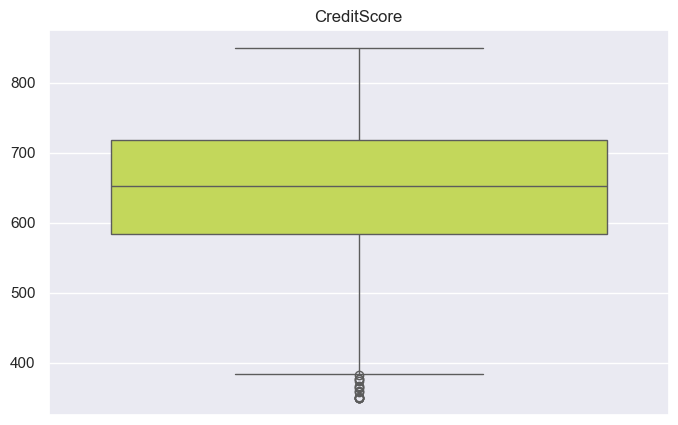

The median is:  37.0


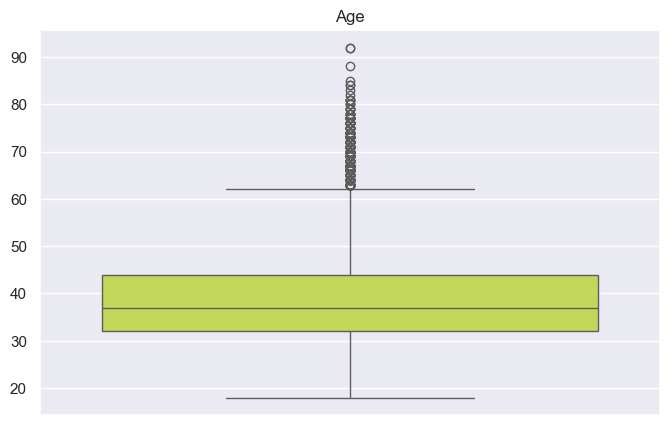

The median is:  5.0


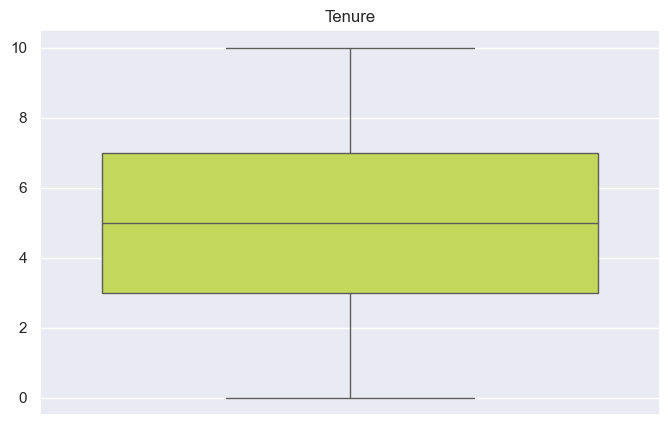

The median is:  97198.54000000001


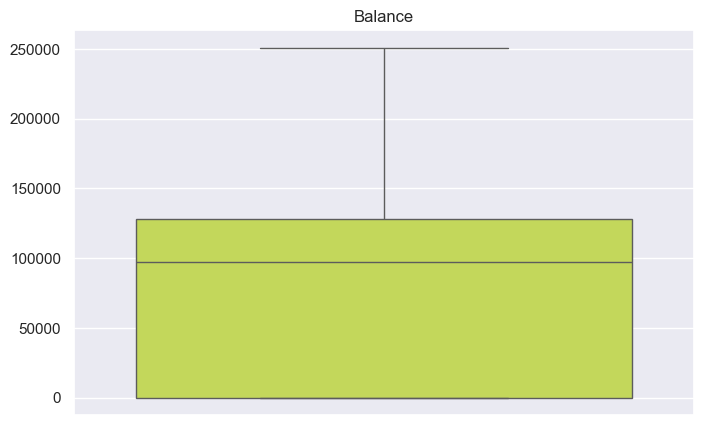

The median is:  1.0


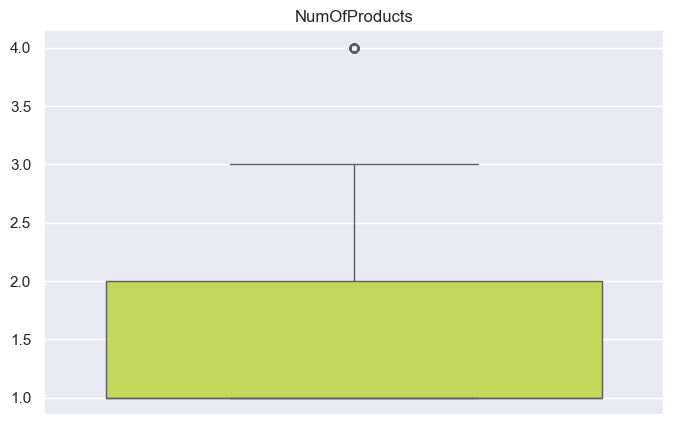

The median is:  1.0


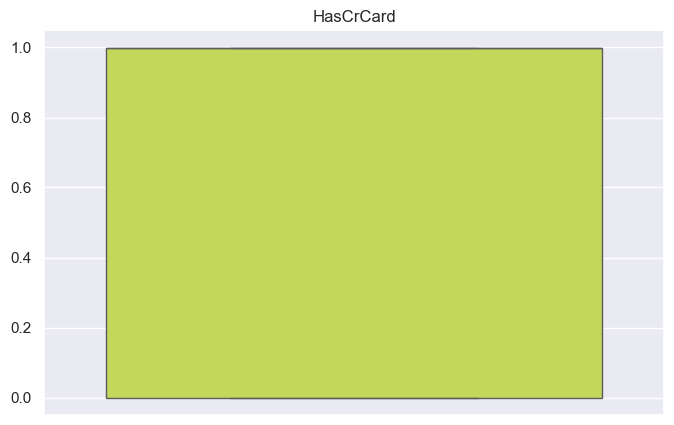

The median is:  1.0


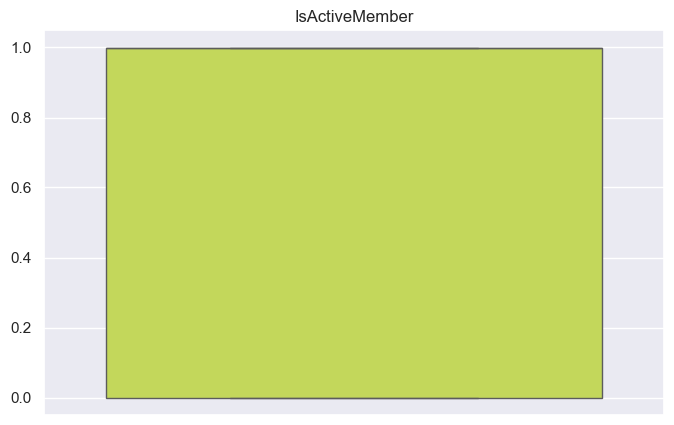

The median is:  100193.915


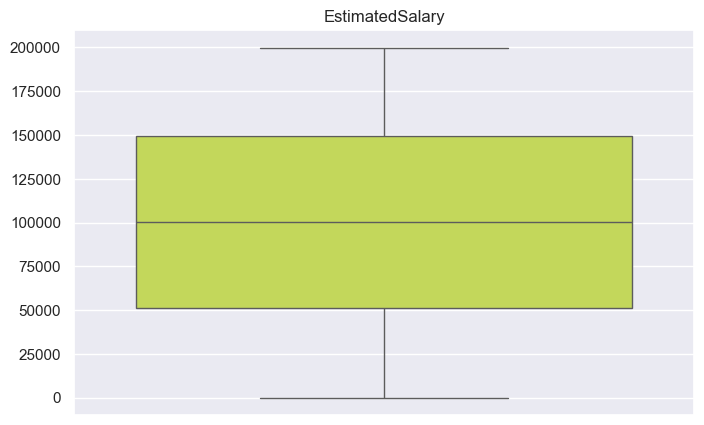

The median is:  0.0


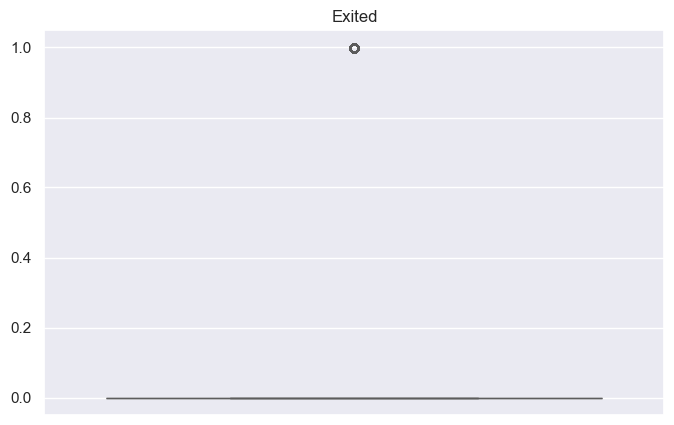

In [11]:
#Check distribution of Numerical Values
numerics=['int64','float64']
num_var=raw_data_visual.select_dtypes(include=numerics).columns

sns.set(rc={'figure.figsize':(8,5)})

for c in num_var:
    x=raw_data_visual[c].values
    ax=sns.boxplot(x,color='#D1EC46')
    print('The median is: ',raw_data_visual[c].median())
    plt.title(c)
    plt.show()

In [12]:
#prepare the final Data Frame
new_raw_data=pd.get_dummies(raw_data_visual,columns =['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])

#scale the columns
scale_vars=['CreditScore', 'EstimatedSalary', 'Tenure', 'Balance', 'Age', 'NumOfProducts']
scaler=MinMaxScaler()
new_raw_data[scale_vars]=scaler.fit_transform(new_raw_data[scale_vars])
new_raw_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,0.538,0.324324,0.2,0.000000,0.000000,0.506735,1,True,False,False,True,False,False,True,False,True
1,0.516,0.310811,0.1,0.334031,0.000000,0.562709,0,False,False,True,True,False,True,False,False,True
2,0.304,0.324324,0.8,0.636357,0.666667,0.569654,1,True,False,False,True,False,False,True,True,False
3,0.698,0.283784,0.1,0.000000,0.333333,0.469120,0,True,False,False,True,False,True,False,True,False
4,1.000,0.337838,0.2,0.500246,0.000000,0.395400,0,False,False,True,True,False,False,True,False,True


## Running XGBoost

In [13]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:200: UserWarning: [23:31:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Accuracy: 0.96
Testing Accuracy: 0.86


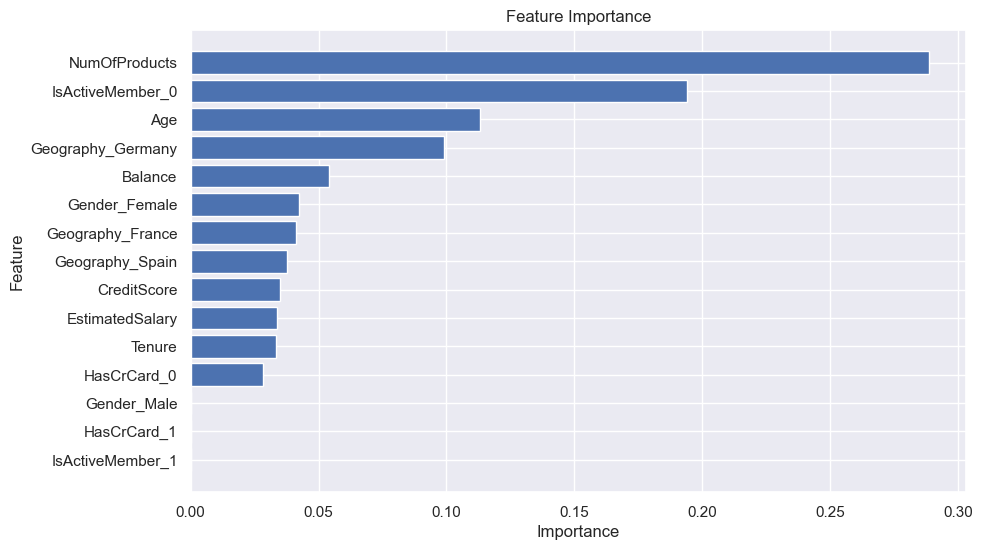


Feature Importance:


,Feature,Importance
4,NumOfProducts,0.288658
13,IsActiveMember_0,0.194039
1,Age,0.113240
7,Geography_Germany,0.099048
3,Balance,0.053883
9,Gender_Female,0.042302
6,Geography_France,0.041067
8,Geography_Spain,0.037478
0,CreditScore,0.034965
5,EstimatedSalary,0.033707


In [14]:
#features (X) and targets (Y)
X=new_raw_data.drop(columns=['Exited'])
y=new_raw_data['Exited']

#Split the data set into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# initialize the XGBoost Classifier
model=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# predictions
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

# training and testing accuracy
train_accuracy=accuracy_score(y_train,y_train_pred)
test_accuracy=accuracy_score(y_test,y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Feature Importance
feature_importance=pd.DataFrame({
    'Feature':X_train.columns,
    'Importance':model.feature_importances_
}).sort_values(by='Importance',ascending=False)

# Ploting Feature Importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'],feature_importance['Importance'],align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
#invert the y axis for better readability
plt.gca().invert_yaxis()
plt.show()

# Display feature importance
print("\nFeature Importance:")
feature_importance

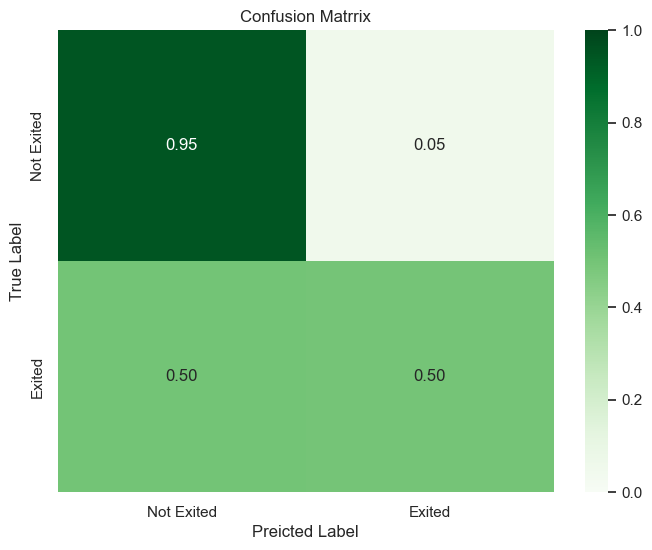

In [15]:
# Confusion Matrix
def plot_confusion_matrix(cm,classes=None,title='Confusion Matrrix'):
    """Plots a confusion Matrix"""
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0, vmax=1, annot=True, cmap="Greens",fmt='.2f')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Preicted Label')
    plt.show()

# Calculate Confusion Matrix
cm=confusion_matrix(y_test,y_test_pred, normalize='true')
plot_confusion_matrix(cm,classes=["Not Exited", "Exited"])

Since we are not predicting Exited well, we will use **SMOTE** library to oversample the minority class

In [16]:
# Using smote to resample the minority class

from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:200: UserWarning: [23:38:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Accuracy: 0.97
Testing Accuracy: 0.85


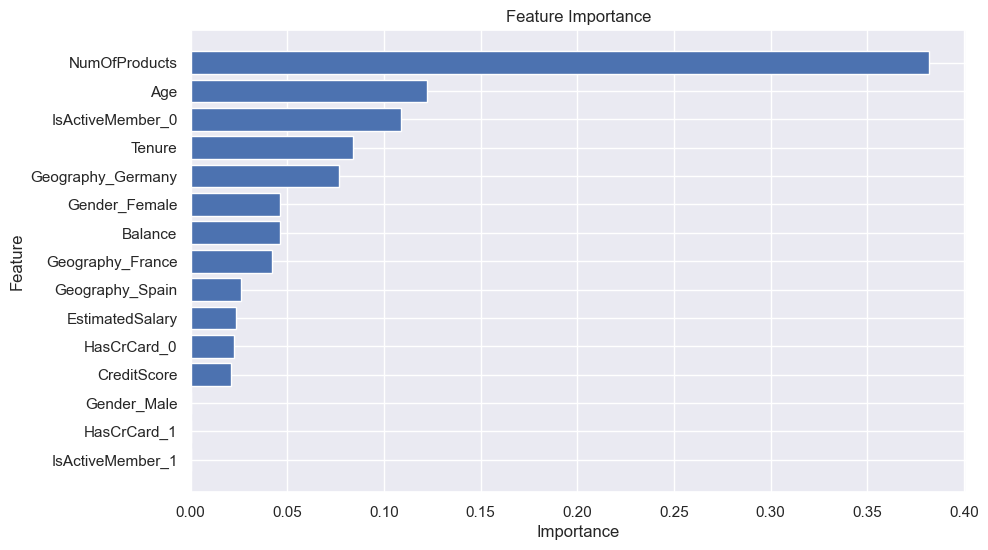


Feature Importance:


,Feature,Importance
4,NumOfProducts,0.381849
1,Age,0.122459
13,IsActiveMember_0,0.108570
2,Tenure,0.083962
7,Geography_Germany,0.076442
9,Gender_Female,0.046143
3,Balance,0.045987
6,Geography_France,0.042168
8,Geography_Spain,0.025858
5,EstimatedSalary,0.023325


In [17]:
# Applying smote to oversample the minority class in the training set

smote=SMOTE(random_state=42)
X_train_resampled,y_train_resampled,=smote.fit_resample(X_train, y_train)

# initialize the XGBoost Classifier
model=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# predictions
y_train_pred=model.predict(X_train_resampled)
y_test_pred=model.predict(X_test)

# training and testing accuracy
train_accuracy=accuracy_score(y_train_resampled,y_train_pred)
test_accuracy=accuracy_score(y_test,y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Feature Importance
feature_importance=pd.DataFrame({
    'Feature':X_train.columns,
    'Importance':model.feature_importances_
}).sort_values(by='Importance',ascending=False)

# Ploting Feature Importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'],feature_importance['Importance'],align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
#invert the y axis for better readability
plt.gca().invert_yaxis()
plt.show()

# Display feature importance
print("\nFeature Importance:")
feature_importance

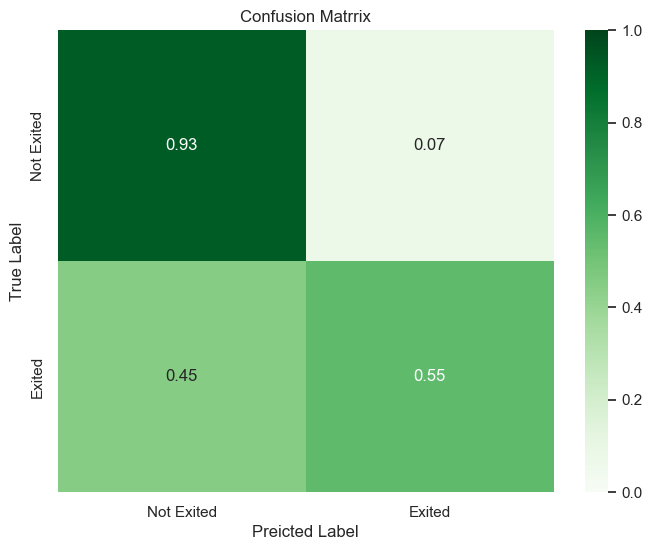

In [18]:
# calculate the confusion matrix
cm=confusion_matrix(y_test,y_test_pred, normalize='true')
plot_confusion_matrix(cm,classes=["Not Exited", "Exited"])

The Model did improve but the accuracy is still low